# Sentiment analysis | Depp vs Heard

## Data extraction

Twitter extraction by keywords

### Imports

In [1]:
import tweepy as tw
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gonzalozabala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gonzalozabala/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Twitter authentificathion

In [2]:
ACCESS_KEY = "1528407397403959296-SiXEMki1ykYG1qg3WPht56Dh1nxvfm"
ACCESS_SECRET = "6BBykwX8DUyDKYpQ46pT7RfPMBM3E7muynpOpYSjgqPwo"
CONSUMER_KEY= 'fVDe8jYU1oWQKkOZlVHd17DDR'
CONSUMER_SECRET= '3EPEAxlpGl48QYl2iNBk6HlbrjONLWQ5qoDY61uVReLeHgbX6V'
BEARER = "AAAAAAAAAAAAAAAAAAAAADTKdAEAAAAAEygerXyhYaLCb0wzIuc7wsOak7w%3DJ6QKl3DzawKIUGdQaArG8yovhy8LpUr0MTgovJQ01naJ5b2BRZ"

In [3]:
import tweepy as tw
client = tw.Client(bearer_token=BEARER) 

### Tweets extraction

In [4]:
tag = 'otter'
query = '#'+ tag +' -is:retweet lang:en'
tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at'], max_results=100)


In [5]:
import pandas as pd

tweets_df = pd.DataFrame(tweets.data)
tweets_df


,created_at,id,text
0,2022-06-02 19:01:06+00:00,1532437166478872576,Round 3 - complete 💦\n\n#cum #uncut #otter #ha...
1,2022-06-02 18:00:04+00:00,1532421807524945920,On my knees for you \n\n#hung #gay #gayuk #ukg...
2,2022-06-02 16:08:23+00:00,1532393701166702598,#subscribe to my #of😘 https://t.co/VfxBa5VrAU ...
3,2022-06-02 16:01:16+00:00,1532391910698098688,Art © Me\nChar © WereFox [inkbunny] 🏝️\n#furry...
4,2022-06-02 16:00:34+00:00,1532391734172438532,I-I-I\nWanna show-oh-oh\nAll the dir-ir-irt\nI...
...,...,...,...
95,2022-05-30 23:00:01+00:00,1531410127969890305,Evening bump.\n\n#nsfw #furry #furryart #male ...
96,2022-05-30 22:36:20+00:00,1531404166324699136,Hey #dumb #fag get lost on your DONGGG!!! #don...
97,2022-05-30 21:00:04+00:00,1531379941148958723,Otter Enjoying Food Shortclip https://t.co/tjl...
98,2022-05-30 20:47:19+00:00,1531376733936668674,Amazing day with @PeteWalkden1973 we would hig...


### Data pre-processing

Remove tags, links, rt, break lines, and puntuactions

https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac

In [6]:
tags = "\B@\w+"
rt = 'RT'
links = "\S*https?:\S*"
break_line = "\n"
puntuaction = '[^\w\s]'

patterns_to_delete = [tags, rt, links, break_line, puntuaction]
patterns_to_delete

['\\B@\\w+', 'RT', '\\S*https?:\\S*', '\n', '[^\\w\\s]']

In [7]:
for pattern in patterns_to_delete:
    tweets_df['text'] = tweets_df['text'].str.replace(pattern, '', regex=True)

tweets_df

,created_at,id,text
0,2022-06-02 19:01:06+00:00,1532437166478872576,Round 3 complete cum uncut otter hairyasshole
1,2022-06-02 18:00:04+00:00,1532421807524945920,On my knees for you hung gay gayuk ukgay briti...
2,2022-06-02 16:08:23+00:00,1532393701166702598,subscribe to my of lgbt ftm nsfw t4t poly gay...
3,2022-06-02 16:01:16+00:00,1532391910698098688,Art MeChar WereFox inkbunny furry art otter
4,2022-06-02 16:00:34+00:00,1532391734172438532,IIIWanna showohohAll the diririrtI got running...
...,...,...,...
95,2022-05-30 23:00:01+00:00,1531410127969890305,Evening bumpnsfw furry furryart male otter riv...
96,2022-05-30 22:36:20+00:00,1531404166324699136,Hey dumb fag get lost on your DONGGG dong sir ...
97,2022-05-30 21:00:04+00:00,1531379941148958723,Otter Enjoying Food Shortclip video shorts yo...
98,2022-05-30 20:47:19+00:00,1531376733936668674,Amazing day with we would highly recommmend h...


Removing stop words

In [8]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweets_df['text'] = tweets_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweets_df


,created_at,id,text
0,2022-06-02 19:01:06+00:00,1532437166478872576,Round 3 complete cum uncut otter hairyasshole
1,2022-06-02 18:00:04+00:00,1532421807524945920,On knees hung gay gayuk ukgay britishgay gayco...
2,2022-06-02 16:08:23+00:00,1532393701166702598,subscribe lgbt ftm nsfw t4t poly gay transman ...
3,2022-06-02 16:01:16+00:00,1532391910698098688,Art MeChar WereFox inkbunny furry art otter
4,2022-06-02 16:00:34+00:00,1532391734172438532,IIIWanna showohohAll diririrtI got running dra...
...,...,...,...
95,2022-05-30 23:00:01+00:00,1531410127969890305,Evening bumpnsfw furry furryart male otter riv...
96,2022-05-30 22:36:20+00:00,1531404166324699136,Hey dumb fag get lost DONGGG dong sir daddy b8...
97,2022-05-30 21:00:04+00:00,1531379941148958723,Otter Enjoying Food Shortclip video shorts you...
98,2022-05-30 20:47:19+00:00,1531376733936668674,Amazing day would highly recommmend workshops ...


Tokenization and lemmatization:

In [9]:
from nltk.stem import WordNetLemmatizer

# Tokenization
tokenized_tweet = tweets_df['text'].apply(lambda x: x.split())

# Lemmatization
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

#List of words to strings
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['text'] = tokenized_tweet
tweets_df


,created_at,id,text
0,2022-06-02 19:01:06+00:00,1532437166478872576,Round 3 complete cum uncut otter hairyasshole
1,2022-06-02 18:00:04+00:00,1532421807524945920,On knee hung gay gayuk ukgay britishgay gaycou...
2,2022-06-02 16:08:23+00:00,1532393701166702598,subscribe lgbt ftm nsfw t4t poly gay transman ...
3,2022-06-02 16:01:16+00:00,1532391910698098688,Art MeChar WereFox inkbunny furry art otter
4,2022-06-02 16:00:34+00:00,1532391734172438532,IIIWanna showohohAll diririrtI got running dra...
...,...,...,...
95,2022-05-30 23:00:01+00:00,1531410127969890305,Evening bumpnsfw furry furryart male otter riv...
96,2022-05-30 22:36:20+00:00,1531404166324699136,Hey dumb fag get lost DONGGG dong sir daddy b8...
97,2022-05-30 21:00:04+00:00,1531379941148958723,Otter Enjoying Food Shortclip video short yout...
98,2022-05-30 20:47:19+00:00,1531376733936668674,Amazing day would highly recommmend workshop m...


### Visualization

Wordcloud

In [10]:
text = " ".join(review for review in tweets_df.text.astype(str))

In [11]:
wordcloud = WordCloud(background_color="white", width=500, height=500).generate(text)

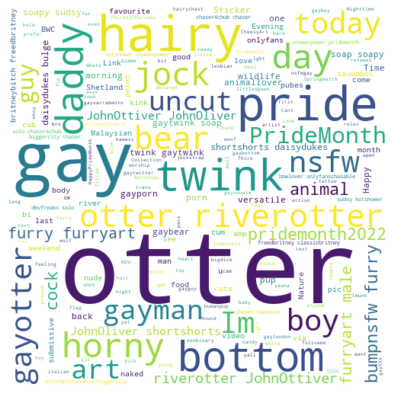

In [12]:

# Display the generated image:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()


### Model

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def apply_sia(text):
    sia = SentimentIntensityAnalyzer()
    polarity_scores = sia.polarity_scores(text)
    if polarity_scores['neu'] == 1.0:
        return "Neutral tweet"
    else:
        if polarity_scores['pos'] > polarity_scores['neg']:
            return "Positive tweet" 
        else:
            return "Negative tweet"

def apply_tb(text):
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity >= 0:
        return 'positive'
    else: 
        return 'negative'

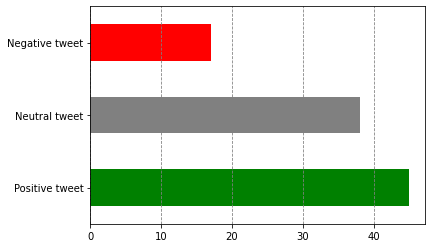

In [14]:
sentiments_nltk = pd.DataFrame(columns=['Tweet', 'Sentiment'])
for index, row in tweets_df.iterrows():
    df_length = len(sentiments_nltk)
    sentiments_nltk.loc[df_length] = [row['text'], apply_sia(row['text'])]
sentiments_nltk

sentiments_nltk['Sentiment'].value_counts().plot(   kind='barh', 
                                                    color=['green', 'grey', 'red']).grid(   color='gray', 
                                                                                            linestyle='dashed', 
                                                                                            axis='x')

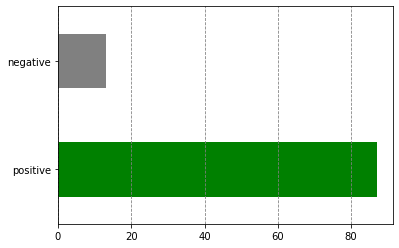

In [17]:
sentiments_nltk = pd.DataFrame(columns=['Tweet', 'Sentiment'])
for index, row in tweets_df.iterrows():
    df_length = len(sentiments_nltk)
    sentiments_nltk.loc[df_length] = [row['text'], apply_tb(row['text'])]
sentiments_nltk

sentiments_nltk['Sentiment'].value_counts().plot(   kind='barh', 
                                                    color=['green', 'grey', 'red']).grid(   color='gray', 
                                                                                            linestyle='dashed', 
                                                                                            axis='x')